## Sztuczne sieci neuronowe - laboratorium 11

In [ ]:
!pip install matplotlib
!pip install albumentations 

### Data augmentation

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import torch, torchvision
from torchvision import datasets, transforms
import os
from torch.utils.data import DataLoader

In [2]:
IMAGENET_MEANS = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

IMAGENET_IMG_SIZE = 224

DATA_PATH = pathlib.Path("common/data/hymenoptera_data")

In [3]:
training_transforms = transforms.Compose([
        transforms.RandomResizedCrop(IMAGENET_IMG_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(IMAGENET_MEANS, IMAGENET_STD)
    ])

In [4]:
validation_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(IMAGENET_IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEANS, IMAGENET_STD)
])

#### Ćwiczenie

Wczytaj trzykrotnie uczący zbiór danych z katalogu `common/data/hymenoptera_data`:
- `images_dataset` - jako obrazki `PIL.Image`
- `centered_dataset` - jako tensory po przejściu przez`validation_transforms`
- `augmented_dataset` - jako tensory po przejściu przez `training_transforms`

In [6]:
images_dataset = datasets.ImageFolder(os.path.join(DATA_PATH, 'train'))
centered_dataset = datasets.ImageFolder(os.path.join(DATA_PATH, 'train'), transform=validation_transforms)
augmented_dataset = datasets.ImageFolder(os.path.join(DATA_PATH, 'train'), transform=training_transforms)

#### Ćwiczenie

Uzupełnij poniższą komórkę, aby wyświetlić obok siebie cztery obrazki ze zbioru `centered_dataset`. Użyj klasy `torch.utils.data.Dataloader` i podanej funkcji `show_tensor`.

In [8]:
def show_tensor(t: torch.Tensor, title=None):
    """Imshow for Tensor."""
    t = t.numpy().transpose((1, 2, 0))
    mean = np.array(IMAGENET_MEANS)
    std = np.array(IMAGENET_STD)
    t = std * t + mean
    t = np.clip(t, 0, 1)
    plt.imshow(t)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

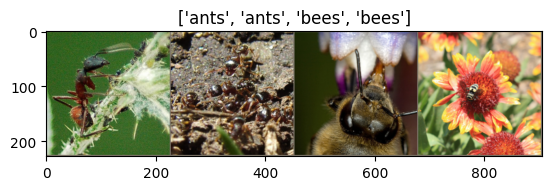

In [9]:
centered_dataloader = DataLoader(centered_dataset, batch_size=4, shuffle=True)
centered_inputs, classes = next(iter(centered_dataloader))

centered_grid = torchvision.utils.make_grid(centered_inputs)
show_tensor(centered_grid, title=[centered_dataset.classes[x] for x in classes])

#### Ćwiczenie

Powtórz powyższe ćwiczenie, tym razem dla zbioru `augmented_dataset`.

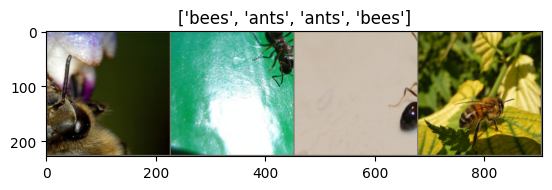

In [13]:
augmented_dataloader = DataLoader(augmented_dataset, batch_size=4, shuffle=True)
augmented_inputs, classes = next(iter(augmented_dataloader))

augmented_grid = torchvision.utils.make_grid(augmented_inputs)
show_tensor(augmented_grid, title=[augmented_dataset.classes[x] for x in classes])

#### Ćwiczenie

Listę transformacji (obiekt `Compose`) można także zaaplikować bezpośrednio do obrazka `PIL.Image` wywołując ją jak funkcję z argumentem `img`.

Przepuść wybrany obrazek (a potem sprawdź inne) przez `validation_transforms` i `training_transforms`. Zwizualizuj wynik.

In [19]:
img, label = images_dataset[0]
img_training_compose = training_transforms(img)
img_validation_compose = validation_transforms(img)

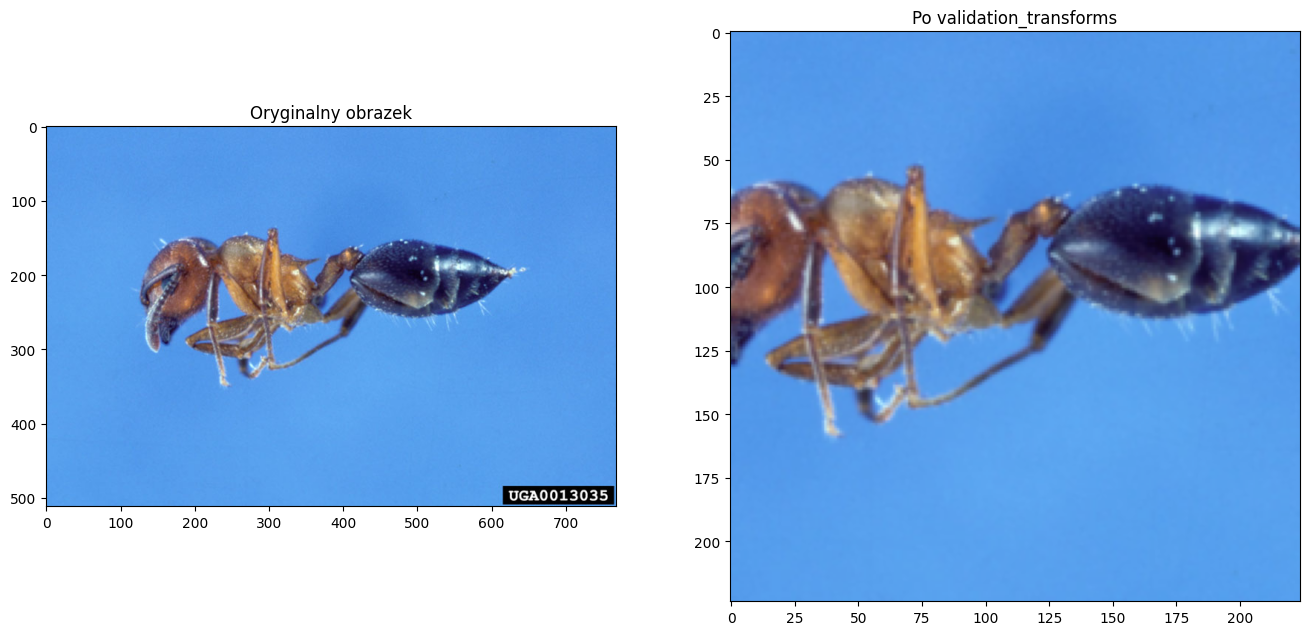

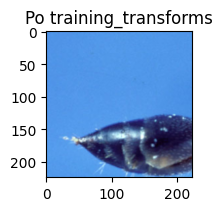

In [28]:
plt.figure(figsize=(25, 10))

# Oryginalny obrazek
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Oryginalny obrazek')

# Obrazek po validation_transforms
plt.subplot(1, 3, 2)
show_tensor(img_validation_compose, title='Po validation_transforms')

# Obrazek po training_transforms
plt.subplot(1, 3, 3)
show_tensor(img_training_compose, title='Po training_transforms')

plt.show()

#### Ćwiczenie

Wypróbuj różne augmentacje z https://pytorch.org/vision/stable/transforms.html i zwizualizuj ich wpływ na wybrany obrazek ze zbioru `images_dataset`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


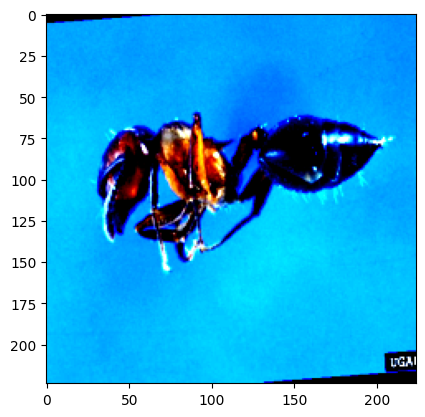

In [48]:
custom_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=(IMAGENET_IMG_SIZE), scale=(0.8, 1.0)),
    transforms.ToTensor(),  # Przekształcenie obrazka do tensora
    transforms.Normalize(IMAGENET_MEANS, IMAGENET_STD)
])

transformed_example = custom_transforms(img=images_dataset[0][0])

plt.imshow(transformed_example.permute(1, 2, 0))

### Data augmentation - albumentations

- https://albumentations.ai/docs/examples/example
- https://albumentations.ai/docs/examples/migrating_from_torchvision_to_albumentations
- https://albumentations.ai/docs/examples/pytorch_classification